<a href="https://colab.research.google.com/github/prteek/housing_data_analysis/blob/master/mean_value_model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Value model

In [0]:
# Authorise and mount google drive to access code and data files
import os
from google.colab import drive
drive.mount('/content/drive')
project_folder = '/content/drive/My Drive/git_repos/housing_data_analysis/'
os.chdir(project_folder)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
l,fam,a,mm,fm,ba,ls,mgr,fgr,l_r,o_r,tf=np.loadtxt("19062019 clean 44 3.txt", unpack="True") #unpack the data

In [0]:
def scatter_plot_with_binned_mean(x,y, bin_size, x_label, y_label):
    """this function plots scatter plot of raw data and mean of binned data
    usage:
    scatter_plot_with_binned_mean(a, mgr, 10, "age", "mgr")
    scatter_plot_with_binned_mean(ba, mgr, [1960, 1970, 1980, 1990, 2000, 2010, 2020], "building age", "mgr")"""
    
    x             = np.array(x)
    y             = np.array(y)
    
    if isinstance(bin_size, int): # Check if bin_size is provided as a size of bin then compute bins using this size
        max_bin_value = int(max(x)*1.2)
        bins          = [i*bin_size for i in range(max_bin_value//bin_size + 1)]
    else: # if size_bin is provided as list of bins, then use it as it is
        bins = bin_size
        
    bin_center    = [(bins[i]+bins[i+1])/2 for i,i_bin in enumerate(bins) 
                     if i_bin < max(bins)]
    
    y_means_binned = []
    means_matrix   = []
    for i_bin, _ in enumerate(bins): # loop over each bin
        if bins[i_bin] < max(bins): # loop from first to second-last bin only else you'll get error
            y_current_bin = []
            # Find y values in current bin and add mean of those values to a list of means
            y_current_bin = y[np.where(np.logical_and(x<=bins[i_bin+1], x>bins[i_bin]))]
            y_means_binned.append(np.mean(y_current_bin))
            # Resampling data to generate distribution of means
            means_of_trials_in_current_bin = []
            np.random.seed(10) # Set seed value for repeatable results
            for target_shuffles in range(100):
                if y_current_bin.any():
                    means_of_trials_in_current_bin.append(np.mean(np.random.choice(y_current_bin, len(y_current_bin), replace=True)))
                else:
                    means_of_trials_in_current_bin.append(np.nan)
            means_matrix.append(means_of_trials_in_current_bin)
        
    
    y_means_binned = [round(mean_value,2) for mean_value in y_means_binned] # round means to 2 digits after decimal
    fig, ax = plt.subplots(1,3, figsize=(12, 4))
    fig.tight_layout() # To have good space between subplots
    
    # Plot raw data
    ax[0].scatter(x, y) 
    ax[0].set_title("raw "+ x_label + " vs raw " + y_label)
    ax[0].set_xlabel(x_label)
    ax[0].set_ylabel(y_label)
    
    # Plot binned data
    ax[1].scatter(bin_center, y_means_binned)
    ax[1].set_title("binned "+ x_label + " vs mean " + y_label)
    ax[1].set_xlabel("Bin centers of " + x_label)
    ax[1].set_ylabel("Mean value of " + y_label)
    ax[1].set_xticks(bin_center)
    ax[1].grid()

    # Plot violin plot for robustness check
    ax_sns = sns.violinplot(data=means_matrix)
    ax_sns.set(xlabel="ith bin of " + x_label, ylabel="Means of trials", title="Distribution of means")
    ax_sns.grid()
    fig.show()
    
    # print("Means for binned " + x_label + ": " + str(y_means_binned))
    y_means_for_correlation = np.array(y_means_binned)
    y_means_for_correlation[np.isnan(y_means_for_correlation)] = 0
    print("Correlation of binned data with mean value:", round(np.corrcoef(y_means_for_correlation, bin_center)[0][1],2))

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


('Correlation of binned data with mean value:', 0.29)
('Correlation of binned data with mean value:', 0.93)
('Correlation of binned data with mean value:', -0.7)
('Correlation of binned data with mean value:', -0.58)
('Correlation of binned data with mean value:', -0.65)
('Correlation of binned data with mean value:', -0.02)
('Correlation of binned data with mean value:', -0.04)
('Correlation of binned data with mean value:', -0.46)


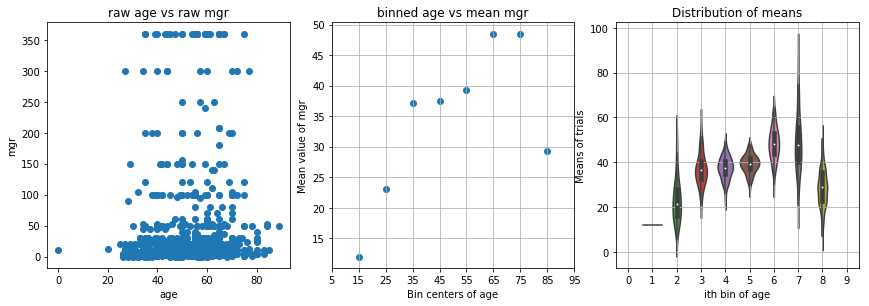

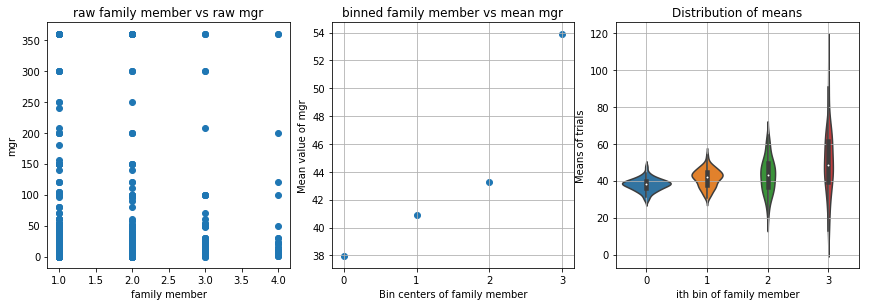

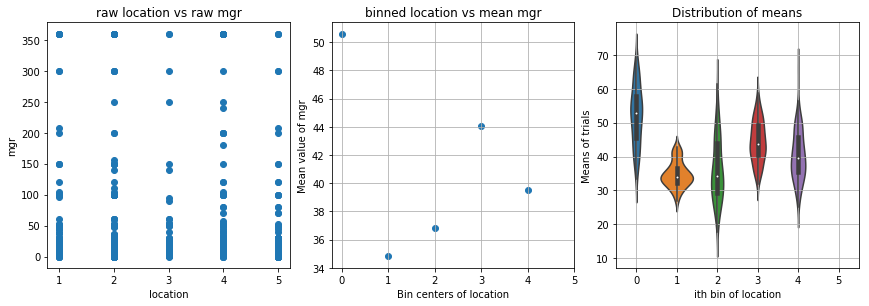

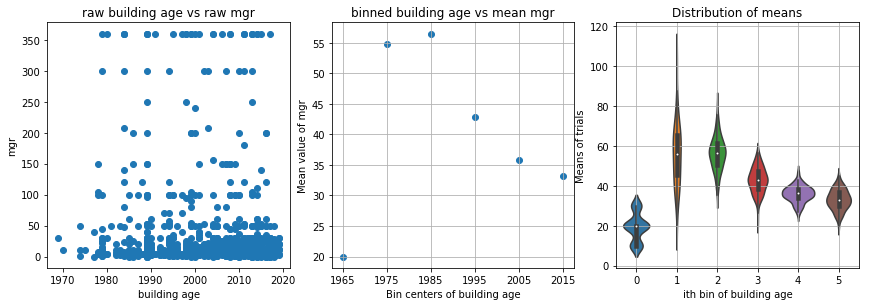

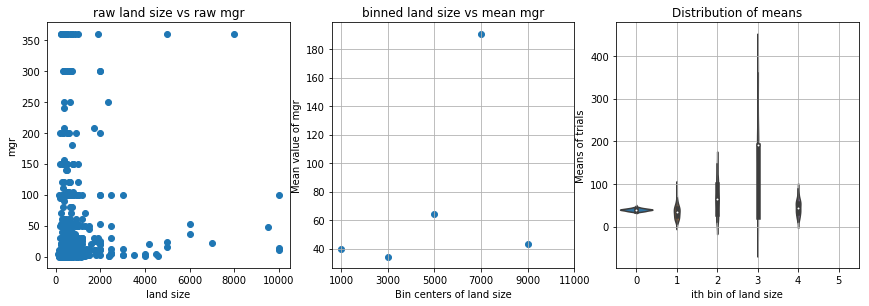

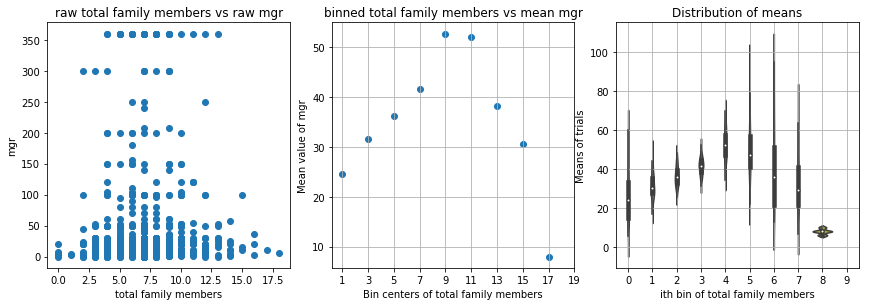

In [0]:
# User inputs
scatter_plot_with_binned_mean(a, mgr, 10, "age", "mgr")
scatter_plot_with_binned_mean(fam, mgr, 1, "family member", "mgr")
scatter_plot_with_binned_mean(l, mgr, 1, "location", "mgr")
scatter_plot_with_binned_mean(mm, mgr, 2, "male members", "mgr")
scatter_plot_with_binned_mean(fm, mgr, 1, "female members", "mgr")
scatter_plot_with_binned_mean(ba, mgr, [1960, 1970, 1980, 1990, 2000, 2010, 2020], "building age", "mgr")
scatter_plot_with_binned_mean(ls, mgr, 2000, "land size", "mgr")
scatter_plot_with_binned_mean(tf, mgr, 2, "total family members", "mgr")
